<a href="https://colab.research.google.com/github/aditya0335/DIC-Assignment1/blob/master/DIC_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive



*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@c177635e71d9.(none)')


Drive-bansaladitya0335@gmail.com

In [0]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
os.chdir('/content/drive/My Drive/DIC ASSIGNMENT 1')
data=pd.read_csv('data.csv')
features=data.iloc[:,0:48]
labels=data.iloc[:,48]
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.2)

In [0]:
!git clone https://github.com/Deepesh7/Predictive-Analysis.git

Cloning into 'Predictive-Analysis'...
fatal: could not read Username for 'https://github.com': No such device or address


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report 
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler


In [4]:
features=np.asarray(features)
features_train=np.asarray(features_train)
features_test=np.asarray(features_test)
labels_train=np.asarray(labels_train)
labels_test=np.asarray(labels_test)
print(features_test.shape)
print(features_train.shape)

row=features_train[:1,]
print(row.shape)
scaler = MinMaxScaler()
features_train=scaler.fit_transform(features_train)
features_test=scaler.transform(features_test)


(8192, 48)
(32764, 48)
(1, 48)


In [0]:
def KNN(X_train,X_test,Y_train):
 
  testresult=[]
  k_value=50
  b=0
  testresult_test=[]
  for row in X_test:
    distance=[]
    knn = []
    row=np.asarray(row)
    row=row.reshape(1,48)
    
    distance=np.sqrt(np.sum(np.square((np.subtract(np.repeat(row,32764,0),X_train))),axis=1))
    distance=distance.reshape(32764,1)
    Y_train=Y_train.reshape(32764,1)
    distance_Y_train=np.concatenate((Y_train,distance),axis=1)
    distance_Y_train =  distance_Y_train[np.argsort(distance_Y_train[:, 1])]    
    knn = distance_Y_train[:k_value]
    knn=knn[:,0]
    knn=knn.astype(int)
    testresult_test=np.append(testresult_test,np.bincount(knn).argmax())
  return testresult_test
result=KNN(features_train,features_test,labels_train)


In [0]:
# from sklearn.metrics import accuracy_score
# from sklearn.neighbors import KNeighborsClassifier

# print(accuracy_score(labels_test,result))


0.978271484375


Deepesh

In [0]:
# -*- coding: utf-8 -*-
"""
Predicitve_Analytics.py
"""


def Accuracy(y_true,y_pred):
  # """
  # :type y_true: numpy.ndarray
  # :type y_pred: numpy.ndarray
  # :rtype: float
  
  # """
  size=y_true.size
  correct_pred = np.sum(y_true == y_pred)
  
  return correct_pred / size

Pooja

In [0]:
from sklearn.metrics import recall_score

def Recall(y_true,y_pred):
  classes=np.unique(y_true)
  size=len(y_pred)
  true_positive=0
  false_negative=0
  recall=0
  for c in classes:
    for i in range(size):
      if y_true[i]==c and y_pred[i]==c:
        true_positive +=1
      if y_true[i]==c and y_pred[i]!=c:
        false_negative +=1
    if (true_positive==0 and false_negative==0):
      recall=0
    else:
      recall+=true_positive/(true_positive+false_negative)
  return recall/len(classes)
result=result.astype(int)
print(Recall(labels_test,result))
print(recall_score(labels_test,result,average='macro'))
    #  """
    # :type y_true: numpy.ndarray
    # :type y_pred: numpy.ndarray
    # :rtype: float
    # """



0.9787535343396627
0.9779098872944286


Aditya

In [0]:
from sklearn.metrics import precision_score

def Precision(y_true,y_pred):
  classes=np.unique(y_true)
  size=len(y_pred)
  true_positive=0
  false_positive=0
  precision=0
  for c in classes:
    for i in range(size):
      if y_true[i]==c and y_pred[i]==c:
        true_positive +=1
      if y_true[i]!=c and y_pred[i]==c:
        false_positive +=1
    if (true_positive==0 and false_positive==0):
      precision=0
    else:
      precision+=true_positive/(true_positive+false_positive)
  return precision/len(classes)
result=result.astype(int)

print(Precision(labels_test,result))
print(precision_score(labels_test,result,average='macro'))


0.9730574853928385
0.9781589935498108


In [0]:
def WCSS(Clusters):
    """
    :Clusters List[numpy.ndarray]
    :rtype: float
    """
    wcss_sum = 0
    for i in range(len(Clusters)):
        center = np.mean(Clusters[i],axis = 0)
        dist = np.linalg.norm(Clusters[i] - center, axis = 1)
        dist = dist ** 2

        dist = np.sum(dist)
        
        wcss_sum += dist
    
    return wcss_sum

In [0]:
def ConfusionMatrix(y_true,y_pred):
  unique_val=np.unique(y_true)
  no_class = len(unique_val)
  y_true=y_true-1
  y_pred=y_pred-1

  confusion_matrix=y_true*no_class+y_pred
  con_matrix= np.zeros(no_class**2)
  for i in range(len(confusion_matrix)): 
    index=confusion_matrix[i]
    count=np.count_nonzero(confusion_matrix==(index))
    con_matrix[index]=count

  con_matrix_reshape=np.reshape(con_matrix, (no_class,no_class))
  return con_matrix_reshape

result=result.astype(int)
print(ConfusionMatrix(labels_test,result))  
    # """
    # :type y_true: numpy.ndarray
    # :type y_pred: numpy.ndarray
    # :rtype: float
    # """ 


(8192,)
(8192,)
[[709.   0.   0.   0.   0.  20.   0.   0.   0.   0.   0.]
 [  1. 712.   0.   0.   0.   0.   0.   0.   1.  24.   0.]
 [  0.   0. 705.   1.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1. 732.   0.   0.   0.   0.   0.   0.   0.]
 [  1.   0.   2.   9. 706.   0.   0.   7.   0.   0.   0.]
 [  7.   0.   0.   0.   0. 758.   0.   0.   9.   0.   0.]
 [  0.   0.   0.   0.   0.   0. 775.   0.   0.   0.   0.]
 [  0.   0.   0.   3.  12.   1.   0. 730.   0.   0.   0.]
 [  3.   2.   0.   0.   0.  28.   0.   0. 728.   1.   0.]
 [  0.  50.   0.   0.   0.   0.   0.   0.   0. 724.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 730.]]


Aditya

RANDOM FOREST

In [0]:
features_train=np.asarray(features_train)
features_test=np.asarray(features_test)
labels_train=np.asarray(labels_train)
labels_test=np.asarray(labels_test)

def gini_number(data):
  classes=np.unique(data[:,-1]) 
  size=len(data)
 
  score=0
  for class_values in classes:
    score =score + np.square(np.count_nonzero(data[:,-1]== class_values)/size)
  gini=1-score
  return gini



  


def information_gain(dataset):
  # print(dataset.shape)
  percent=[10,20,30,40,50,60,70,80,90]
  i=-1
  gain=-9999
  left_data= None
  right_data= None
  new=[]
  datafeatures=dataset[:,0:dataset.shape[1]-1]
  #print(dataset.shape[1])
  left_gini,right_gini=0,0
  # value
  # index_column
  for column in datafeatures.T:

    i+=1
    # new=np.column_stack((features_train[:,i],labels_train))

    n_instances=float(len(dataset))
    if(n_instances<=1):
      continue
    gini_column=gini_number(dataset[:,[i,-1]])
    for percentile in percent:
      
      
      new=np.argsort(dataset[:,i])
      split=np.percentile(dataset[:,i],percentile)
      left=dataset[dataset[:,i]<split]
      left_size=float(len(left))
      right=dataset[dataset[:,i]>=split]
      right_size=float(len(right))
      # if(left_size > 0):
      left_gini=gini_number(left)
      # if (right_size > 0):
      right_gini=gini_number(right)
      weighted_gini=left_gini*(left_size/n_instances)+right_gini*(right_size/n_instances)
      info_gain=gini_column-weighted_gini
      if(info_gain>gain):
        gain,left_data,right_data,index_column,value=info_gain,left,right,i,split
  # print(index_column,value)
  return {'gain':gain,'left':left_data,'right':right_data,'index':index_column,'value':value}

def splitting(node,max_depth):
  # print(type(node['left']))
  # print(node['left'])
  depth=10
  minsize=2   
  left=node['left']
  right=node['right']
  del(node['left'])
  del(node['right'])
  left_label=left[:,-1]
  left_label=left_label.astype(int)
  right_label=right[:,-1]
  right_label=right_label.astype(int)
  values=[]
  if(len(left)==0 or len(right)==0):
    values=np.concatenate((left,right))
    vl=values[:,-1].astype(int)
    final_label=np.bincount(vl).argmax()
    node['left']=node['right']=final_label
    # print(node['left'])
    return
  if(max_depth>=depth):
    node['left']=np.bincount(left_label).argmax()
    # print(node['left'])
    node['right']=np.bincount(right_label).argmax()
    # print(node['right'])
    return
  if(minsize>=len(left)):
    node['left']=np.bincount(left_label).argmax()
    # print(node['left'])
  else:
    node['left']=information_gain(left)
    d=max_depth+1
    splitting(node['left'],d)
  if(minsize>=len(right)):
    node['right']=np.bincount(right_label).argmax()
    # print(node['right'])
  else:
    node['right']=information_gain(right)
    d=max_depth+1
    splitting(node['right'],d)
  # if(minsize<=right(left)):
  #   node[2]=np.bincount(right_label).argmax()

def predictions(root,row):
  if (row[root['index']]>root['value']):
    if isinstance(root['right'],dict):
      pred_val=predictions(root['right'],row)
    else:
      #print(root['right'])
      pred_val=root['right']
  else:
    if isinstance(root['left'],dict):
      pred_val=predictions(root['left'],row)
    else:
      #print(root['left'])
      pred_val=root['left']
  return pred_val


def decision_tree(data,test):
  
  node=information_gain(data)
  splitting(node,1)
  #print(node)
  test_predictions=[]
  for row in test:
    predicted=predictions(node,row)
    #print(predicted)
    test_predictions=np.append(test_predictions,predicted)
  return test_predictions
  # print(node)



# node=information_gain(data.values)
# decision_tree(features_train,labels_train,features_test)
#print()
  



In [0]:
def RandomForest(X_train,Y_train,X_test):
  X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())
  Y_train = (Y_train-Y_train.min())/(Y_train.max()-Y_train.min())
  epochs=10
  total_predictions=[]
  predicted_label=[]
  for i in range(epochs):
    features_for_split=np.sqrt(np.size(X_train,1)) #7 features
    #print(features_for_split)
    index=np.arange(X_train.shape[1])
    random_sample=np.random.choice(index,size=features_for_split.astype(int),replace=True)
    random_features=features_train[:,random_sample]
    #print(random_features.shape)
    test_features=X_test[:,random_sample]
    total_data=np.column_stack((random_features,Y_train))
    index_bootstrap=np.arange(X_train.shape[0])
    bootstrap_sample=np.random.choice(index_bootstrap,X_train.shape[0],replace=True)
    
    bootstrap_data=total_data[bootstrap_sample,:]
    #print(bootstrap_data.shape)
    total_predictions=np.append(total_predictions,decision_tree(bootstrap_data,test_features))
    # print(total_predictions.shape)
  total_predictions=total_predictions.reshape(epochs,X_test.shape[0])
  total_predictions=total_predictions.astype(int)
  # print(total_predictions)
  for row in total_predictions.T:
    predicted_label=np.append(predicted_label,np.bincount(row).argmax())
  return predicted_label
  
  
# print(labels_test.shape)
labels_predict=RandomForest(features_train,labels_train,features_test)
# print(labels_predict.shape)
print(accuracy_score(labels_test,labels_predict))
  
    # """
    # :type X_train: numpy.ndarray
    # :type X_test: numpy.ndarray
    # :type Y_train: numpy.ndarray
    
    # :rtype: numpy.ndarray
    # """

0.9146728515625


Pooja

In [0]:
def PCA(X_train,N):
    mean_Val = np.mean(X_train)
    X_train_mean=X_train-mean_Val
    u,s,vh = np.linalg.svd(X_train_mean, full_matrices=False)
    vh=vh.T
    S=np.diag(s)
    PCA_array = u[:, 0:N].dot(S[0:N, 0:N])
    return PCA_array
    # """
    # :type X_train: numpy.ndarray
    # :type N: int
    # :rtype: numpy.ndarray
    # """

[[-1.80899866 -0.97319046 -0.5198029  -0.13335396  0.01226552]
 [-1.70718706 -0.75001261 -0.23565801 -0.06914143 -0.0288503 ]
 [-1.75438486  0.08561008  0.1374438   0.12996271  0.04488621]
 ...
 [-1.91909963  0.70648457 -0.17498945  0.00307458 -0.14257381]
 [-1.72978258 -0.47746372  0.06421288  0.1703747   0.10250725]
 [-1.89899469  0.20191737 -0.23136465  0.08107682  0.05495291]]


Deepesh

In [0]:
def Kmeans(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: List[numpy.ndarray]
    """
    X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())
    
    num_rows = X_train.shape[0]
    indexes = np.random.choice(num_rows, size=N, replace=False)
    
    centers = X_train[indexes, :]
    #centers = X_train.sample(n = N)
    #X_train = X_train.to_numpy()
    #centers = centers.to_numpy()
    centers_prev = np.zeros(centers.shape)

    while(not np.array_equal(centers,centers_prev)):
        cluster_distance = np.zeros((N, len(X_train)))
        #print(type(cluster_distance))
        centers_prev = np.copy(centers)
        for i in range(len(centers)):
            c = centers[i].reshape(1,len(centers[0]))
            #cluster_distance[i,:] = np.sqrt(np.sum(((X_train - c) ** 2),axis = 1))
            cluster_distance[i,:] = np.linalg.norm(X_train - c, axis = 1)
        min_index = np.argmin(cluster_distance,axis=0)

        #print(min_index)
        for i in range(len(centers)):
            centers[i] = np.mean(X_train[np.where(min_index == i)],axis = 0)
        #print(centers)
        
        #print(not np.array_equal(centers_prev,centers))
    print(centers)
    min_index = min_index + 1
    #print(np.unique(min_index))
    #print(min_index.shape)
    return min_index

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [5]:
data_train, data_test = train_test_split(data, train_size=0.8, test_size=0.2, random_state=7)

X_train = data_train.iloc[:,:-1].to_numpy()
Y_train = data_train.iloc[:,-1].to_numpy()

X_test = data_test.iloc[:,:-1].to_numpy()
Y_test = data_test.iloc[:,-1].to_numpy()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(32764, 48)
(32764,)
(8192, 48)
(8192,)


In [0]:
SklearnSupervisedLearning(features_train,labels_train,features_test,labels_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.85791015625
0.893310546875
0.98681640625
0.980712890625


(array([ 9, 10,  1, ...,  6,  1, 11]),
 array([ 9, 10,  1, ...,  6,  1, 11]),
 array([ 9, 10,  1, ...,  6,  1, 11]),
 array([ 9, 10,  1, ...,  6,  1, 11]))

In [0]:
def SklearnSupervisedLearning(X_train,Y_train,X_test,Y_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
    classifier = MyLogisticRegression(X_train,Y_train)
    log_regr_y_pred = classifier.predict(X_test)
    print("Accuracy of Logistic Regression: "+Accuracy(Y_test,log_regr_y_pred))

    classifier = MySVClassifier(X_train,Y_train)
    svm_y_pred = classifier.predict(X_test)
    print("Accuracy of SVM: "+Accuracy(Y_test,svm_y_pred))

    classifier = MyKNNClassifier(X_train,Y_train)
    knn_y_pred = classifier.predict(X_test)
    print("Accuracy of KNN: "+Accuracy(Y_test,knn_y_pred))

    classifier = MyDTClassifier(X_train,Y_train)
    DT_y_pred = classifier.predict(X_test)
    print("Accuracy of Decision Tree: "+Accuracy(Y_test,DT_y_pred))

    return log_regr_y_pred,svm_y_pred,knn_y_pred,DT_y_pred


In [0]:
def MyLogisticRegression(X_train,Y_train): #85.8% 
    logistic_regr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
    logistic_regr.fit(X_train,Y_train)
    return logistic_regr
    
def MyKNNClassifier(X_train,Y_train): #98.4%
    knn = KNeighborsClassifier(n_neighbors = 11, weights='uniform')
    knn.fit(X_train,Y_train)
    return knn

def MyDTClassifier(X_train,Y_train): #98.2%
    classifier = tree.DecisionTreeClassifier()
    classifier = classifier.fit(X_train,Y_train)
    return classifier

def MySVClassifier(X_train,Y_train): #90.1%
    svclassifier = SVC(kernel = 'linear')
    svclassifier.fit(X_train,Y_train)
    return svclassifier

In [0]:
def SklearnVotingClassifier(X_train,Y_train,X_test,Y_test):
    
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
    logistic_regr = MyLogisticRegression(X_train,Y_train)
    knn = MyKNNClassifier(X_train,Y_train)
    svclassifier = MySVClassifier(X_train,Y_train)
    DTclassifier = MyDTClassifier(X_train,Y_train)
    
    models = [('logisitc_regr',logistic_regr),('knn',knn),('svclassifier',svclassifier),('DecisionTree',DTclassifier)]
    ensemble = VotingClassifier(models,voting = 'hard')
    ensemble.fit(X_train,Y_train)
    y_pred = ensemble.predict(X_test)
    print(Accuracy(Y_test,y_pred))
    return y_pred


"""
Create your own custom functions for Matplotlib visualization of hyperparameter search. 
Make sure that plots are labeled and proper legends are used
"""

GRID SEARCH OF HYPERPARAMETERS

[5, 6, 11, 5, 6, 11]


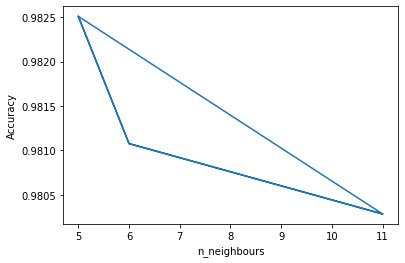

In [13]:
from sklearn.model_selection import GridSearchCV
def KNeighboursClassifier_grid(features_train,features_test,labels_train,labels_test):
  knn_grid = KNeighborsClassifier()
  knn_grid_dict={'n_neighbors':[5,6,11],
                'algorithm':['auto','ball_tree']}
  knn_grid_search = GridSearchCV(estimator=knn_grid,
                      param_grid=knn_grid_dict,
                      scoring='accuracy',
                      )
  knn_grid_search.fit(features_train,labels_train)
  Y_predict=knn_grid_search.predict(features_test)
  params = knn_grid_search.cv_results_['params']
  num_neighbors = []
  for p in params:
    num_neighbors.append(p['n_neighbors'])
  print(num_neighbors)
  KNN_Accuracy=pd.DataFrame(knn_grid_search.cv_results_,columns=['mean_test_score'])
  plt.plot(num_neighbors,KNN_Accuracy)
  plt.xlabel('n_neighbours')
  plt.ylabel('Accuracy')

  plt.show
KNeighboursClassifier_grid(features_train,features_test,labels_train,labels_test)


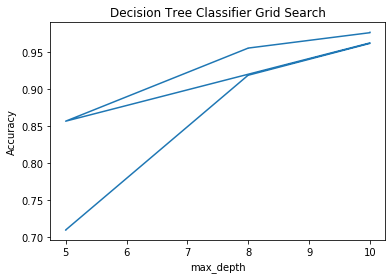

In [16]:
def Decision_tree_Classifier_grid(features_train,features_test,labels_train,labels_test):
  classifier_grid= tree.DecisionTreeClassifier()
  decision_tree_dict={'max_depth':[5,8,10],
                'criterion':['gini','entropy'],
                'min_samples_split':[2,4]}
  decision_tree_search = GridSearchCV(estimator=classifier_grid,
                      param_grid=decision_tree_dict,
                      scoring='accuracy',
                      )
  decision_tree_search.fit(features_train,labels_train)
  Y_predict_decision=decision_tree_search.predict(features_test)
  # print("Accuracy :"+ Accuracy(labels_test,Y_predict))

  params = decision_tree_search.cv_results_['params']
  max_depth = []
  for p in params:
    max_depth.append(p['max_depth'])
  Decision_Accuracy=pd.DataFrame(decision_tree_search.cv_results_,columns=['mean_test_score'])
  plt.plot(max_depth,Decision_Accuracy)
  plt.xlabel('max_depth')
  plt.ylabel('Accuracy')
  plt.title("Decision Tree Classifier Grid Search")
  plt.show
Decision_tree_Classifier_grid(features_train,features_test,labels_train,labels_test)

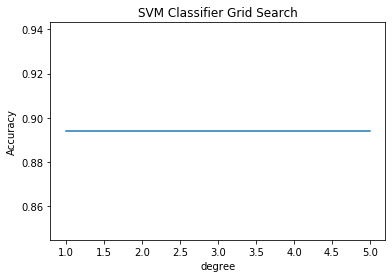

In [17]:
def SVClassifier_grid(features_train,features_test,labels_train,labels_test):

  svclassifier_grid = SVC()
  svm_dict={'gamma':['scale','auto'],
                'degree':[1,4,5],
                'kernel':['linear']}
  svm_search = GridSearchCV(estimator=svclassifier_grid,
                      param_grid=svm_dict,
                      scoring='accuracy',
                      )
  svm_search.fit(features_train,labels_train)
  Y_predict_svm=svm_search.predict(features_test)
  # print("Accuracy :"+ Accuracy(labels_test,Y_predict))
  params = svm_search.cv_results_['params']
  degree = []
  for p in params:
    degree.append(p['degree'])
  SVM_Accuracy=pd.DataFrame(svm_search.cv_results_,columns=['mean_test_score'])
  plt.plot(degree,SVM_Accuracy)
  plt.xlabel('degree')
  plt.ylabel('Accuracy')
  plt.title("SVM Classifier Grid Search")
  plt.show
SVClassifier_grid(features_train,features_test,labels_train,labels_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'mean_fit_time': array([9.28645592, 3.85437951, 8.40632396, 9.79556551]), 'std_fit_time': array([0.33153624, 0.07998274, 0.04994897, 0.0513949 ]), 'mean_score_time': array([0.00266976, 0.00259233, 0.00392647, 0.00302787]), 'std_score_time': array([2.52097740e-04, 9.05067827e-05, 9.56714747e-04, 3.41540033e-04]), 'param_multi_class': masked_array(data=['multinomial', 'multinomial', 'multinomial',
                   'multinomial'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['newton-cg', 'lbfgs', 'sag', 'saga'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'multi_class': 'multinomial', 'solver': 'newton-cg'}, {'multi_class': 'multinomial', 'solver': 'lbfgs'}, {'multi_class': 'multinomial', 'solver': 'sag'}, {'multi_class': 'multinomial', 'solver': 'saga'}], 'split0_test_score': array([0.8687624 , 0.85396002, 0.86830459, 0.86830459]), '

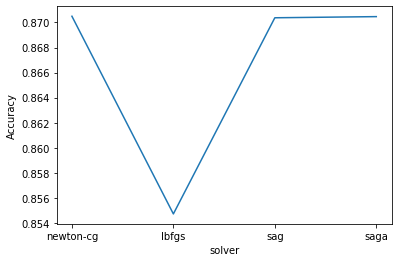

In [93]:
def Logistic_Regression_grid(features_train,features_test,labels_train,labels_test):
  logistic_regr_grid = LogisticRegression()
  logistic_dict={'solver': ['newton-cg', 'lbfgs','sag', 'saga'],
                  'multi_class':['multinomial']}
  logistic_search = GridSearchCV(estimator=logistic_regr_grid,
                      param_grid=logistic_dict,
                      scoring='accuracy',
                      )
  logistic_search.fit(features_train,labels_train)
  Y_predict_logistic=logistic_search.predict(features_test)
  # print("Accuracy :"+ Accuracy(labels_test,Y_predict))
  print(logistic_search.cv_results_)
  params = logistic_search.cv_results_['params']
  solver = []
  for p in params:
    solver.append(p['solver'])
  logistic_Accuracy=pd.DataFrame(logistic_search.cv_results_,columns=['mean_test_score'])
  plt.plot(solver,logistic_Accuracy)
  plt.xlabel('solver')
  plt.ylabel('Accuracy')
  plt.title('Logistic regression Grid Search')
  plt.show
Logistic_Regression_grid(features_train,features_test,labels_train,labels_test)